In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
nba = pd.read_csv('../data/NBA_train.csv')
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SeasonEnd  835 non-null    int64 
 1   Team       835 non-null    object
 2   Playoffs   835 non-null    int64 
 3   W          835 non-null    int64 
 4   PTS        835 non-null    int64 
 5   oppPTS     835 non-null    int64 
 6   FG         835 non-null    int64 
 7   FGA        835 non-null    int64 
 8   2P         835 non-null    int64 
 9   2PA        835 non-null    int64 
 10  3P         835 non-null    int64 
 11  3PA        835 non-null    int64 
 12  FT         835 non-null    int64 
 13  FTA        835 non-null    int64 
 14  ORB        835 non-null    int64 
 15  DRB        835 non-null    int64 
 16  AST        835 non-null    int64 
 17  STL        835 non-null    int64 
 18  BLK        835 non-null    int64 
 19  TOV        835 non-null    int64 
dtypes: int64(19), object(1)
memory u

In [3]:
nba.head(2)

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539


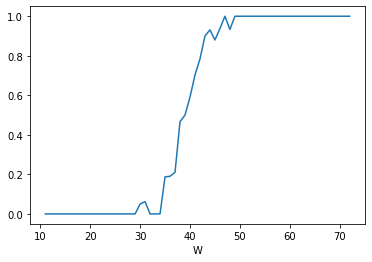

In [4]:
nba.groupby('W')['Playoffs'].mean().sort_index().plot();

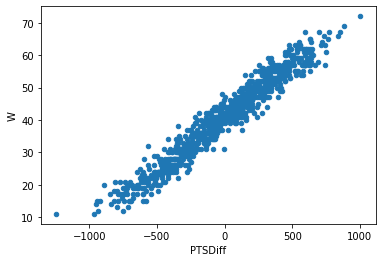

In [5]:
nba['PTSDiff'] = nba['PTS'] - nba['oppPTS']
nba.plot.scatter('PTSDiff', 'W');

In [6]:
X1 = nba[['PTSDiff']]
y1 = nba['W']

wins_reg = sm.OLS(y1, sm.add_constant(X1)).fit()
print(wins_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:42:01   Log-Likelihood:                -2118.0
No. Observations:                 835   AIC:                             4240.
Df Residuals:                     833   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0000      0.106    387.027      0.0

In [7]:
features2 = ['2PA', '3PA', 'FTA', 'AST', 'ORB', 'DRB', 'TOV', 'STL', 'BLK']
X2 = nba[features2]
y2 = nba['PTS']

points_reg2 = sm.OLS(y2, sm.add_constant(X2)).fit()
print(points_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     817.3
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:42:02   Log-Likelihood:                -5541.1
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     825   BIC:                         1.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2050.8108    203.487    -10.078      0.0

In [8]:
y2_pred = points_reg2.predict()
residuals2 = y2 - y2_pred

sse2 = (residuals2**2).sum()
print(f"SSE: {sse2.round(3)}")

rmse2 = rmse(y2, y2_pred)
print(f"RMSE: {np.round(rmse2, 3)}")

SSE: 28394313.995
RMSE: 184.405


In [9]:
features3 = ['2PA', '3PA', 'FTA', 'AST', 'ORB', 'DRB', 'STL', 'BLK']
X3 = nba[features3]
y3 = nba['PTS']

points_reg3 = sm.OLS(y3, sm.add_constant(X3)).fit()
print(points_reg3.summary())

y3_pred = points_reg3.predict()
residuals3 = y3 - y3_pred

sse3 = (residuals3**2).sum()
print(f"SSE: {sse3.round(3)}")

rmse3 = rmse(y3, y3_pred)
print(f"RMSE: {np.round(rmse3, 3)}")

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     920.4
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:42:02   Log-Likelihood:                -5541.2
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     826   BIC:                         1.114e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2076.6782    193.084    -10.755      0.0

In [10]:
features4 = ['2PA', '3PA', 'FTA', 'AST', 'ORB', 'STL']
X4 = nba[features4]
y4 = nba['PTS']

points_reg4 = sm.OLS(y4, sm.add_constant(X4)).fit()
print(points_reg4.summary())

y4_pred = points_reg4.predict()
residuals4 = y4 - y4_pred

sse4 = (residuals4**2).sum()
print(f"SSE: {sse4.round(3)}")

rmse4 = rmse(y4, y4_pred)
print(f"RMSE: {np.round(rmse4, 3)}")

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1229.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:42:02   Log-Likelihood:                -5541.5
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     828   BIC:                         1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2032.7164    162.942    -12.475      0.0

In [11]:
nba_test = pd.read_csv('../data/NBA_test.csv')
nba_test.head(2)

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,2013,Atlanta Hawks,1,44,8032,7999,3084,6644,2378,4743,706,1901,1158,1619,758,2593,2007,664,369,1219
1,2013,Brooklyn Nets,1,49,7944,7798,2942,6544,2314,4784,628,1760,1432,1958,1047,2460,1668,599,391,1206


In [12]:
X_test = nba_test[features4]
y_test = nba_test['PTS']

points_pred = points_reg4.predict(sm.add_constant(X_test))
residuals_test = y_test - points_pred

sse_test = (residuals_test**2).sum()
sst = ((y_test - y4.mean())**2).sum()
r2_test = (1 - sse_test / sst).round(3)
rmse_test = np.round(rmse(y_test, points_pred), 3)

print(f"SSE: {sse_test.round(3)}\nR2: {r2_test}\nRMSE: {rmse_test}")

SSE: 1079738.729
R2: 0.813
RMSE: 196.372
